In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/leilaff89/house_sales_prediction/main/datasets/house_prices_no_null.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
# apply log to a better distribution 
df['PRICE'] = np.log(df.PRICE)
df['FLOOR_AREA'] = np.log(df.FLOOR_AREA)
df['NEAREST_STN_DIST'] = np.log(df.NEAREST_STN_DIST)
df['NEAREST_SCH_DIST'] = np.log(df.NEAREST_SCH_DIST)

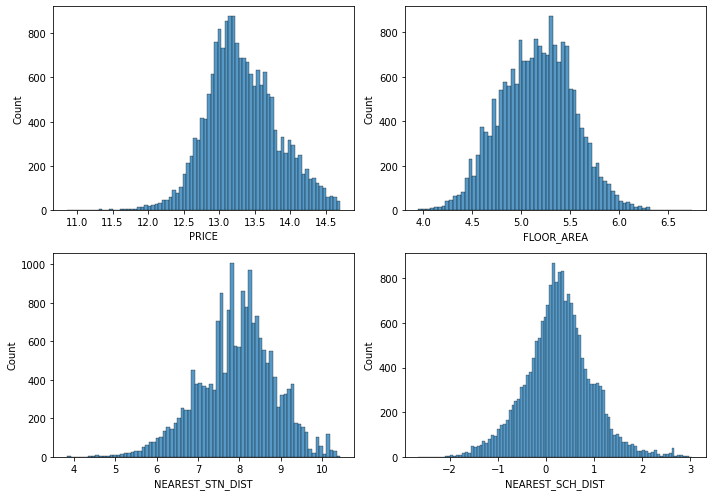

In [ ]:
# visualizing 
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,2,1)
sns.histplot(df['PRICE'])
fig.add_subplot(2,2,2)
sns.histplot(df['FLOOR_AREA'])
fig.add_subplot(2,2,3)
sns.histplot(df['NEAREST_STN_DIST'])
fig.add_subplot(2,2,4)
sns.histplot(df['NEAREST_SCH_DIST'])
plt.tight_layout()

In [ ]:
# change SUBURB category for PRICE mean
new_df = df.groupby('SUBURB', as_index=False)['PRICE'].mean()
replace_dict = new_df.set_index('SUBURB').to_dict()['PRICE']
df = df.replace(replace_dict)

In [ ]:
df2 = df
# drop columns with low correlation in df2
df2 = df.drop(columns=['ADDRESS','LAND_AREA','POSTCODE','NEAREST_STN','NEAREST_SCH','MONTH_SOLD'])

In [ ]:
# get dummies in df
dum = pd.get_dummies(df[['NEAREST_STN','NEAREST_SCH']])
df = df.join(dum)
df = df.drop(columns=['ADDRESS','LAND_AREA','POSTCODE','NEAREST_STN','NEAREST_SCH','MONTH_SOLD'])

In [ ]:
df.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD,NEAREST_STN_Armadale Station,NEAREST_STN_Ashfield Station,NEAREST_STN_Bassendean Station,NEAREST_STN_Bayswater Station,NEAREST_STN_Beckenham Station,NEAREST_STN_Belmont Park Station,NEAREST_STN_Bull Creek Station,NEAREST_STN_Burswood Station,NEAREST_STN_Butler Station,NEAREST_STN_Canning,NEAREST_STN_Canning Bridge Station,NEAREST_STN_Carlisle Station,NEAREST_STN_Challis Station,NEAREST_STN_City West Station,NEAREST_STN_Claisebrook Station,NEAREST_STN_Claremont Station,NEAREST_STN_Clarkson Station,NEAREST_STN_Cockburn Central Station,NEAREST_STN_Cottesloe Station,NEAREST_STN_Currambine Station,NEAREST_STN_Daglish Station,NEAREST_STN_East Guildford Station,NEAREST_STN_East Perth Station,NEAREST_STN_Edgewater Station,NEAREST_STN_Esplanade Station,NEAREST_STN_Fremantle Station,...,NEAREST_SCH_METHODIST LADIES' COLLEGE,NEAREST_SCH_MINDARIE SENIOR COLLEGE,NEAREST_SCH_MORLEY SENIOR HIGH SCHOOL,NEAREST_SCH_MOUNT LAWLEY SENIOR HIGH SCHOOL,NEAREST_SCH_NEWMAN COLLEGE,NEAREST_SCH_OCEAN REEF SENIOR HIGH SCHOOL,NEAREST_SCH_PENRHOS COLLEGE,NEAREST_SCH_PERTH COLLEGE,NEAREST_SCH_PERTH MODERN SCHOOL,NEAREST_SCH_PETER MOYES ANGLICAN COMMUNITY SCHOOL,NEAREST_SCH_PRENDIVILLE CATHOLIC COLLEGE,NEAREST_SCH_PRESBYTERIAN LADIES COLLEGE,NEAREST_SCH_PROVIDENCE CHRISTIAN COLLEGE,NEAREST_SCH_QUINNS BAPTIST COLLEGE,NEAREST_SCH_ROSSMOYNE SENIOR HIGH SCHOOL,NEAREST_SCH_SACRED HEART COLLEGE,NEAREST_SCH_SAFETY BAY SENIOR HIGH SCHOOL,NEAREST_SCH_SANTA MARIA COLLEGE,NEAREST_SCH_SCOTCH COLLEGE,NEAREST_SCH_SERVITE COLLEGE,NEAREST_SCH_SETON CATHOLIC COLLEGE,NEAREST_SCH_SEVENOAKS SENIOR COLLEGE,NEAREST_SCH_SHENTON COLLEGE,NEAREST_SCH_SOUTHERN RIVER COLLEGE,NEAREST_SCH_ST BRIGID'S COLLEGE,NEAREST_SCH_ST HILDA'S ANGLICAN SCHOOL FOR GIRLS,NEAREST_SCH_ST MARK'S ANGLICAN COMMUNITY SCHOOL,NEAREST_SCH_ST MARY'S ANGLICAN GIRLS' SCHOOL,NEAREST_SCH_ST NORBERT COLLEGE,NEAREST_SCH_ST STEPHEN'S SCHOOL,NEAREST_SCH_SWAN CHRISTIAN COLLEGE,NEAREST_SCH_SWAN VALLEY ANGLICAN COMMUNITY SCHOOL,NEAREST_SCH_THORNLIE SENIOR HIGH SCHOOL,NEAREST_SCH_TRANBY COLLEGE,NEAREST_SCH_TRINITY COLLEGE,NEAREST_SCH_URSULA FRAYNE CATHOLIC COLLEGE,NEAREST_SCH_WANNEROO SECONDARY COLLEGE,NEAREST_SCH_WESLEY COLLEGE,NEAREST_SCH_WILLETTON SENIOR HIGH SCHOOL,NEAREST_SCH_WOODVALE SECONDARY COLLEGE
0,13.151488,12.807653,3,2,2.0,4.934474,2013,26900,8.496990,-32.193470,115.859554,1.709161,129.0,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12.571507,12.567237,3,1,1.0,4.454347,1979,22600,7.549609,-32.120578,115.993579,0.500277,113.0,2015,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13.300859,13.437174,3,2,8.0,4.836282,1999,5900,6.230481,-31.917880,115.907050,-0.065880,29.0,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12.831836,12.814479,3,2,2.0,5.062595,2003,36300,7.649693,-31.654280,115.702200,-0.384423,39.0,2018,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13.167607,13.190022,4,2,4.0,5.509388,2002,23100,8.268732,-32.159590,115.849480,0.797797,129.0,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD
0,13.151488,12.807653,3,2,2.0,4.934474,2013,26900,8.496990,-32.193470,115.859554,1.709161,129.0,2019
1,12.571507,12.567237,3,1,1.0,4.454347,1979,22600,7.549609,-32.120578,115.993579,0.500277,113.0,2015
2,13.300859,13.437174,3,2,8.0,4.836282,1999,5900,6.230481,-31.917880,115.907050,-0.065880,29.0,2019
3,12.831836,12.814479,3,2,2.0,5.062595,2003,36300,7.649693,-31.654280,115.702200,-0.384423,39.0,2018
4,13.167607,13.190022,4,2,4.0,5.509388,2002,23100,8.268732,-32.159590,115.849480,0.797797,129.0,2019


In [ ]:
df.to_csv('house_prices_ml_features_dummies.csv', index=False)

In [ ]:
df2.to_csv('house_prices_ml_features.csv', index=False)